## Aula 10 - Transformações geométricas

Neste notebook iremos usar os métodos do OpenCV para transformações geométricas. Iremos usar os seguintes métodos como base:

1. [warpAffine()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983): aplica uma transformação recebendo uma matriz 2x3
2. [warpPerspective()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87): aplica uma transformação recebendo uma matriz 3x3

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

E agora, vamos carregar a imagem da Lenna:

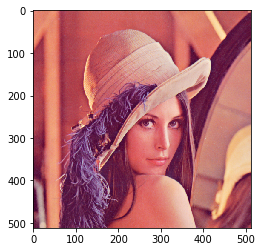

In [7]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

### Escalamento

O escalamento é apenas o redimensionamento da imagem. Usaremos a função [resize()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) para isso.

Dimensão original:  (512, 512, 3) 
Nova dimensão:  (1024, 1024, 3)


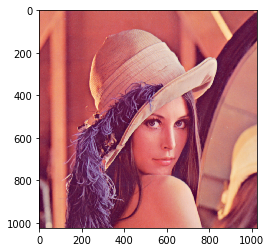

In [12]:
img_escalada = cv2.resize(img, None, fx=2, fy=2)
plt.imshow(img_escalada)
print("Dimensão original: ", img.shape, "\nNova dimensão: ", img_escalada.shape)

No exemplo acima nós aumentamos em uma escala de 2. Podemos também definir valores diretos para a resolução:

Dimensão original:  (512, 512, 3) 
Nova dimensão:  (40, 512, 3)


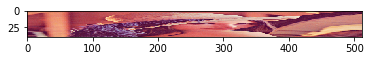

In [14]:
img_escalada = cv2.resize(img, (512, 40))
plt.imshow(img_escalada)
print("Dimensão original: ", img.shape, "\nNova dimensão: ", img_escalada.shape)

### Translação

Translação é mudar a localização do objeto. Podemos definir uma matriz de translação e aplicá-la à imagem usando o método warpAffine().

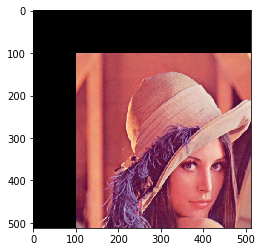

In [17]:
'''

M = [1 0 t_x
     0 1 t_y]

'''


M = np.float32([[1, 0, 100], [0, 1, 100]])
img_translacao = cv2.warpAffine(img, M, (512, 512))
plt.imshow(img_translacao)

### Rotação

No OpenCV, a rotação pode ser feita usando a matriz de rotação com o método já implementado [getRotationMatrix2D()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326). Vamos rotacionar a imagem em 45 graus a partir do centro (por isso vamos dividir por 2):

[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.11000000e+02]]


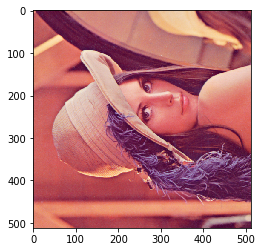

In [20]:
M =  cv2.getRotationMatrix2D(((img.shape[1]-1)/2.0,(img.shape[0]-1)/2.0),90,1)
print(M)
img_rotacionada = cv2.warpAffine(img, M, (512, 512))
plt.imshow(img_rotacionada)

### Affine Transform

Nesta transformada, todas as linhas paralelas na imagem original também serão paralelas na imagem de saída.

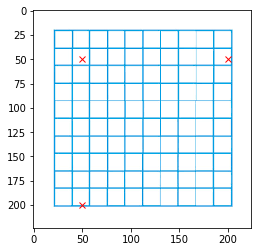

In [40]:
grid = plt.imread('grid.png')
plt.imshow(grid)
plt.plot(50, 50, 'rx', 200, 50, 'rx', 50, 200, 'rx')

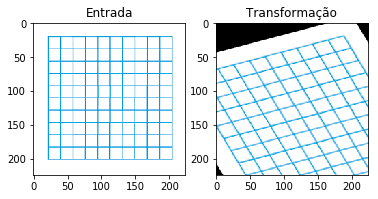

In [45]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img_transformada = cv2.warpAffine(grid,M,(grid.shape[1],grid.shape[0]))
plt.subplot(121),plt.imshow(grid),plt.title('Entrada')
plt.subplot(122),plt.imshow(img_transformada),plt.title('Transformação')
plt.show()

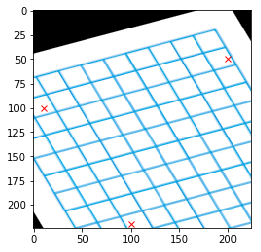

In [44]:
plt.imshow(img_transformada)
plt.plot(10, 100, 'rx', 200, 50, 'rx', 100, 220, 'rx')

### Perspectiva (sem homografia)

Para essa transformação, vamos precisar de uma matriz de transformação. Linhas que eram retas na imagem original vão continuar retas. É necessário 4 pontos em cada imagem para encontrar essa matriz.

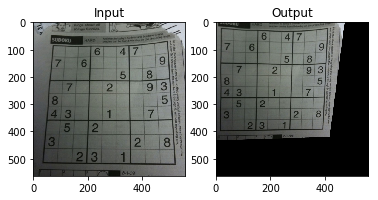

In [49]:
sudoku = plt.imread('sudoku.jpg')

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
perspectiva = cv2.warpPerspective(sudoku,M,(sudoku.shape[1],sudoku.shape[0]))
plt.subplot(121),plt.imshow(sudoku),plt.title('Input')
plt.subplot(122),plt.imshow(perspectiva),plt.title('Output')
plt.show()